<a href="https://colab.research.google.com/github/raulghosh/NLP-Pet-Projects/blob/main/OshoNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the required libraries

In [1]:
# For web scraping
from bs4 import BeautifulSoup, SoupStrainer
import urllib
import urllib.request
from IPython.display import HTML

In [2]:
#general libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#NLP Libraries
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [4]:
# function to retreive page from url

def front_page(url):
    with urllib.request.urlopen(url) as response:
        html=response.read()
    return html

In [5]:
# Retreive the title of the post

def title(doc):
    return doc.find("h1", class_="post-title").get_text()

In [6]:
# retreive the text in the post

def get_text(doc):
    text=[t for t in doc.find_all(text=True) if t.parent.name=='p']
    text = list(filter(None, list(map(lambda s: s.strip(), text))))
    text=[t.rstrip() for t in text if not t.isspace()]
    text=" ".join(text)
    text=text.split(" ")
    text_filtered=[]
    count=0
    for t in text:
        if "Osho" not in t:
            text_filtered.append(t)
        elif "Osho" in t and count==1:
            break
        else:
            count+=1
    text_filtered=" ".join(text_filtered)
    return text_filtered

In [7]:
# Store in a dataframe

def store_text(df,doc):
    df.loc[len(df.index)]=[title(doc), get_text(doc)]
    return df

In [8]:
# main function to retreive and store data

def main(urls):
    df=pd.DataFrame(columns=["Title","Text"])
    for url in urls:
        html=front_page(url)
        soup=BeautifulSoup(html,"html5lib")
        links=list(set([a.get('href') for a in soup.find_all('a')]))
        links_filtered=list(filter(re.compile(r'''.*(oshonews.com\/)\d{4}.*''').match,links))
        for a_link in links_filtered:
            doc=BeautifulSoup(front_page(a_link),"html5lib")
            df=store_text(df,doc)
    return df

### Pass a list of urls

In [10]:
urls=["https://www.oshonews.com/category/1001-tales/","https://www.oshonews.com/category/1001-tales/page/2/","https://www.oshonews.com/category/1001-tales/page/3/","https://www.oshonews.com/category/1001-tales/page/4/","https://www.oshonews.com/category/1001-tales/page/5/"]

In [11]:
df1=main(urls)
df=df1
df.head()

,Title,Text
0,Fetching water for Buddha,“Just sit by the stream of your mind. Don’t do...
1,Four pupils observing silence,“In the search for the first principle silence...
2,Not the right prayer,“Love is a law unto itself; it needs no other ...
3,The chief guest at a play,"says, “Your mind is just… a TV screen or a dra..."
4,God creates man out of mud and bakes him,states: “There is no need to have boundaries o...


### Start text analysis

In [12]:
df['Text'] = df['Text'].astype(str).str.lower()

### tokenize

In [13]:
regexp = RegexpTokenizer('\w+')

df1['text_token']=df['Text'].apply(regexp.tokenize)
df1.head(3)

,Title,Text,text_token
0,Fetching water for Buddha,“just sit by the stream of your mind. don’t do...,"[just, sit, by, the, stream, of, your, mind, d..."
1,Four pupils observing silence,“in the search for the first principle silence...,"[in, the, search, for, the, first, principle, ..."
2,Not the right prayer,“love is a law unto itself; it needs no other ...,"[love, is, a, law, unto, itself, it, needs, no..."


In [14]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [34]:
# Extend the list with your own custom stopwords
my_stopwords = ['said','would']
stopwords.extend(my_stopwords)

In [35]:
# remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,Title,Text,text_token,text_string,text_string_fdist,text_string_lem,polarity
0,Fetching water for Buddha,“just sit by the stream of your mind. don’t do...,"[sit, stream, mind, anything, nothing, expecte...",sit stream mind anything nothing expected stor...,sit stream mind anything nothing expected stor...,sit stream mind anything nothing expected stor...,"{'neg': 0.102, 'neu': 0.801, 'pos': 0.096, 'co..."
1,Four pupils observing silence,“in the search for the first principle silence...,"[search, first, principle, silence, door, door...",search first principle silence door door comme...,search first principle silence door door comme...,search first principle silence door door comme...,"{'neg': 0.05, 'neu': 0.95, 'pos': 0.0, 'compou..."
2,Not the right prayer,“love is a law unto itself; it needs no other ...,"[love, law, unto, needs, law, states, let, tel...",love law unto needs law states let tell small ...,love law unto needs law states let tell small ...,love law unto needs law states let tell small ...,"{'neg': 0.171, 'neu': 0.513, 'pos': 0.316, 'co..."


In [36]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df[['Text', 'text_token', 'text_string']].head()

,Text,text_token,text_string
0,“just sit by the stream of your mind. don’t do...,"[sit, stream, mind, anything, nothing, expecte...",sit stream mind anything nothing expected stor...
1,“in the search for the first principle silence...,"[search, first, principle, silence, door, door...",search first principle silence door door comme...
2,“love is a law unto itself; it needs no other ...,"[love, law, unto, needs, law, states, let, tel...",love law unto needs law states let tell small ...
3,"says, “your mind is just… a tv screen or a dra...","[says, mind, tv, screen, drama, stage, suppose...",says mind screen drama stage supposed act supp...
4,states: “there is no need to have boundaries o...,"[states, need, boundaries, nations, earth, bou...",states need boundaries nations earth boundarie...


In [37]:
# create a list of all the words
all_words = ' '.join([word for word in df['text_string']])

In [38]:
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [39]:
# Create a frequency distribution which records the number of times each word has occurred:

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'man': 825, 'one': 688, 'people': 389, 'come': 372, 'whole': 347, 'going': 330, 'can': 316, 'not': 316, 'god': 315, 'life': 306, ...})

In [40]:
# drop infrequent words
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] > 2 ]))

In [41]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [42]:
# lemmatization
wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [43]:
# wrd cloud
all_words_lem = ' '.join([word for word in df['text_string_lem']])

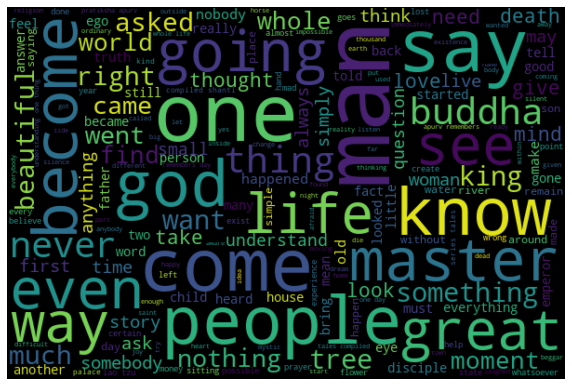

In [44]:
%matplotlib inline

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

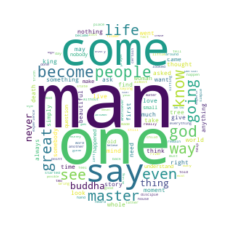

In [45]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

In [46]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

### Most common words

In [47]:
fd.most_common(3)
fd.tabulate(3)


   man    one people 
   825    688    389 


### Plot most common words

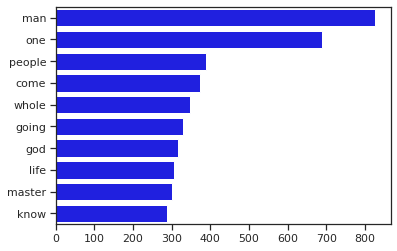

In [48]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [49]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

### Sentiment analysis

In [50]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [51]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [52]:
# Polarity scores

df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,Title,Text,text_token,text_string,text_string_fdist,text_string_lem,polarity
282,A monk carries a woman across the river,“remember that your understanding is shown in ...,"[remember, understanding, shown, every, way, w...",remember understanding shown every way watch c...,remember understanding shown every way watch w...,remember understanding shown every way watch w...,"{'neg': 0.046, 'neu': 0.809, 'pos': 0.145, 'co..."
283,Osho’s 1001 Tales to his Nani – A Finger Point...,introduction to a new series compiled by shant...,"[introduction, new, series, compiled, shanti, ...",introduction new series compiled shanti publis...,new series compiled shanti published love stor...,new series compiled shanti published love stor...,"{'neg': 0.007, 'neu': 0.65, 'pos': 0.343, 'com..."
284,If St. Francis of Assisi would have been born ...,says he would be in a madhouse. from our serie...,"[says, madhouse, series, 1001, tales, compiled...",says madhouse series 1001 tales compiled shant...,says madhouse series 1001 tales compiled shant...,says madhouse series 1001 tales compiled shant...,"{'neg': 0.166, 'neu': 0.659, 'pos': 0.175, 'co..."


In [53]:
# Change data structure
df = pd.concat(
    [df, 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,Title,Text,text_token,text_string,text_string_fdist,text_string_lem,polarity,neg,neu,pos,compound
0,Fetching water for Buddha,“just sit by the stream of your mind. don’t do...,"[sit, stream, mind, anything, nothing, expecte...",sit stream mind anything nothing expected stor...,sit stream mind anything nothing expected stor...,sit stream mind anything nothing expected stor...,"{'neg': 0.105, 'neu': 0.796, 'pos': 0.099, 'co...",0.105,0.796,0.099,-0.4939
1,Four pupils observing silence,“in the search for the first principle silence...,"[search, first, principle, silence, door, door...",search first principle silence door door comme...,search first principle silence door door comme...,search first principle silence door door comme...,"{'neg': 0.05, 'neu': 0.95, 'pos': 0.0, 'compou...",0.050,0.950,0.000,-0.5267
2,Not the right prayer,“love is a law unto itself; it needs no other ...,"[love, law, unto, needs, law, states, let, tel...",love law unto needs law states let tell small ...,love law unto needs law states let tell small ...,love law unto needs law states let tell small ...,"{'neg': 0.173, 'neu': 0.507, 'pos': 0.319, 'co...",0.173,0.507,0.319,0.9887


In [54]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,Title,Text,text_token,text_string,text_string_fdist,text_string_lem,polarity,neg,neu,pos,compound,sentiment
0,Fetching water for Buddha,“just sit by the stream of your mind. don’t do...,"[sit, stream, mind, anything, nothing, expecte...",sit stream mind anything nothing expected stor...,sit stream mind anything nothing expected stor...,sit stream mind anything nothing expected stor...,"{'neg': 0.105, 'neu': 0.796, 'pos': 0.099, 'co...",0.105,0.796,0.099,-0.4939,negative
1,Four pupils observing silence,“in the search for the first principle silence...,"[search, first, principle, silence, door, door...",search first principle silence door door comme...,search first principle silence door door comme...,search first principle silence door door comme...,"{'neg': 0.05, 'neu': 0.95, 'pos': 0.0, 'compou...",0.050,0.950,0.000,-0.5267,negative
2,Not the right prayer,“love is a law unto itself; it needs no other ...,"[love, law, unto, needs, law, states, let, tel...",love law unto needs law states let tell small ...,love law unto needs law states let tell small ...,love law unto needs law states let tell small ...,"{'neg': 0.173, 'neu': 0.507, 'pos': 0.319, 'co...",0.173,0.507,0.319,0.9887,positive
3,The chief guest at a play,"says, “your mind is just… a tv screen or a dra...","[says, mind, tv, screen, drama, stage, suppose...",says mind screen drama stage supposed act supp...,says mind screen drama stage supposed act supp...,says mind screen drama stage supposed act supp...,"{'neg': 0.093, 'neu': 0.731, 'pos': 0.176, 'co...",0.093,0.731,0.176,0.9741,positive


### Analyze

In [55]:
# Tweet with highest positive sentiment
df.loc[df['compound'].idxmax()].values

array(['An angel came to earth',
       '“you are a man on the earth, a woman on the earth; enjoy this gift of god! in deep gratefulness, sing the song, dance the dance that is waiting deep inside your being to be expressed. be creative. flower,” comments in deep gratefulness, sing the song, dance the dance that is waiting deep inside your being to be expressed. i have heard…. once upon a time, an angel came to earth to see man and his world, because he had heard so many stories of man’s splendour that he could not resist his curiosity. the beauty of the world overwhelmed him: the sunlit mountain peaks and dark forests, the whining winds and tossing, rainbow-coloured valleys, the dew-kissed soil, the soil’s lusty smell, the animals, fierce and gentle. everywhere there was such beauty. but when the angel saw man he was awed, for he heard the music of the human heart and the song of the human soul. he fell in deep love with human mystery. dusk came, but he lingered on. man and man’s eart

In [56]:
df.loc[df['compound'].idxmin()].values


array(['The story of Angulimala or a murderer’s road to enlightenment',
       'angulimala “had taken a vow that he would kill one thousand people, not less than that, because the society had not treated him well.” there was one man who was almost mad, a mad murderer. he had taken a vow that he would kill one thousand people, not less than that, because the society had not treated him well. he would take his revenge by killing one thousand people. and from every person killed he would take one finger and make a rosary around his neck – one thousand fingers. because of this, his name became angulimala: the man with a rosary of fingers. he killed nine hundred and ninety-nine people. nobody would move in those parts; wherever people came to know that angulimala was, the traffic would stop. and then it became very difficult for him to find one man – and only one more man was needed. buddha was passing a forest; people came to him from the villages and they said, ”don’t go!angulimala is the

### Visualize

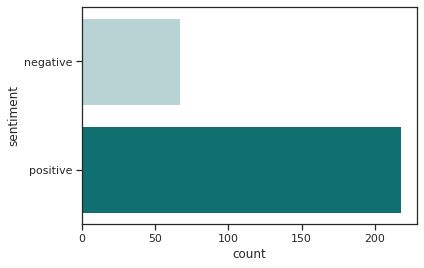

In [57]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

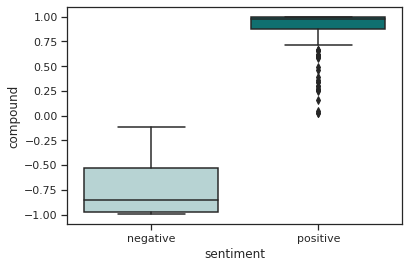

In [59]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);